# Нейроинформатика. Лабораторная работа 1
### Персептроны. Процедура обучения Розенблатта

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.


In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Датасеты:

In [ ]:
def get_dataset(task):
    if task != 1 and task != 2:
        return None, None
    if task == 1:
        data = np.array([[-2.8, 1.4], [-0.2, -3.5], [2.8, -4], [-2.1, -2.7], [0.3, -4.1], [-1, -4]])
        labels = np.array([0, 1, 1, 0, 1, 0])
    elif task == 2:
        data = np.array([[1.7, 3.3], [4.7, -4.5], [-0.5, 0.8], [1.8, 2.1], [1.5, 2.2], [-1.3, 0.8], [-3.9, -4.5], [4.7, -2.2]])
        labels = np.array([[1, 1], [0, 1], [1, 0], [1, 1], [1, 1], [1, 0], [0, 0], [0, 1]])
    assert data.shape[0] == labels.shape[0]
    return data, labels

### Задание 1

In [ ]:
data1, labels1 = get_dataset(1)
data1, labels1

(array([[-2.8,  1.4],
        [-0.2, -3.5],
        [ 2.8, -4. ],
        [-2.1, -2.7],
        [ 0.3, -4.1],
        [-1. , -4. ]]), array([0, 1, 1, 0, 1, 0]))

In [ ]:
data1.shape, labels1.shape

((6, 2), (6,))

Обучим перцептрон для классификации точек

In [ ]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1, activation='sigmoid'))

В качестве лосса я решил использовать бинарную кросс-энтропию (что более привычно для задач классификации).

In [ ]:
model1.compile(loss='bce', optimizer='adam')

In [ ]:
train_info1 = model1.fit(data1, labels1, batch_size=1, epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 13ms/step - loss: 0.4419
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4374
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4338
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4312
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4282
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4241
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4207
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4185
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4140
Epoch 10/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4110
Epoch 11/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4079
Epoch 12/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4052
Epoch 13/500
6/6 [==============================] - 0s 3ms/s

Посмотрим на график лосса

In [ ]:
def plot_loss(train_info):
    plt.figure(figsize=(6, 6))
    loss_history = train_info.history['loss']
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.show()

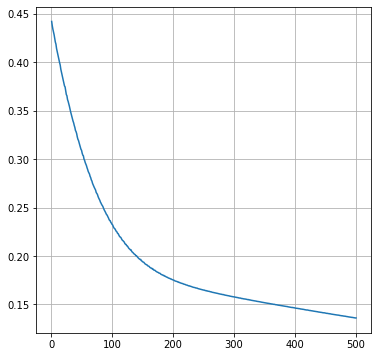

In [ ]:
plot_loss(train_info1)

Лосс падает, перцептрон учится.

Построим разделяющую линию для двумерного случая.

Мы знаем, что однослойный перцептрон - линейный слой, поэтому разделяющая линия будет прямой. Любую прямую можно задать уравнением:

$$ax + by + c = 0$$

С математической точки зрения перцептрон - это функция вида

$$perceptron(v) = vA + b$$
где $v = (x, y)$, $A = (a_0, a_1)^T$

Записывая в скалярном виде:
$$perceptron(x, y) = a_0x + a_1y + b$$

Если значение этой функции больше нуля (сигмоида от результата больше 0.5), то относим точку $(x, y)$ к первому классу, иначе ко второму. Следовательно, искомая разделяющая прямая имеет вид
$$a_0x + a_1y + b = 0$$

Коэффициенты $a_i, b$ нам известны.

Для построения прямой возьмем несколько значений $x$, для каждого из них найдем $y = \frac{(-a_0x - b)}{a_1}$

In [ ]:
def plot_result(data, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(data[:, 0], data[:, 1], c=labels)

    A, b = model.layers[0].get_weights()

    x_disc = np.linspace(-5, 5, 5)
    plt.plot(x_disc, (-A[0] * x_disc - b) / A[1])

    plt.grid()
    if show_result:
        plt.show()

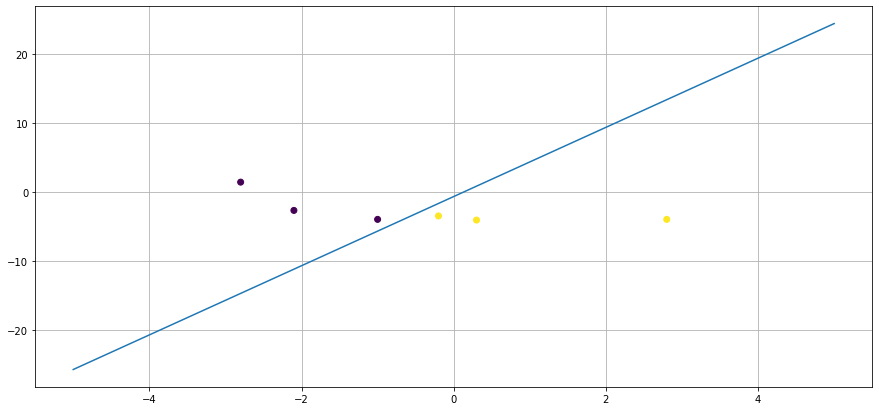

In [ ]:
plot_result(data1, labels1, model1)

Проверка качества перцептрона.

Сгенерим несколько рандомных точек (на графике они будут большего размера). Получим предсказания модели и отметим предсказания соответствующим цветом на картинке

In [ ]:
def check_model(data, labels, model, n=5, threshold=0.5):
    plot_result(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100)
    plt.show()

1/1 [==============================] - 0s 154ms/step


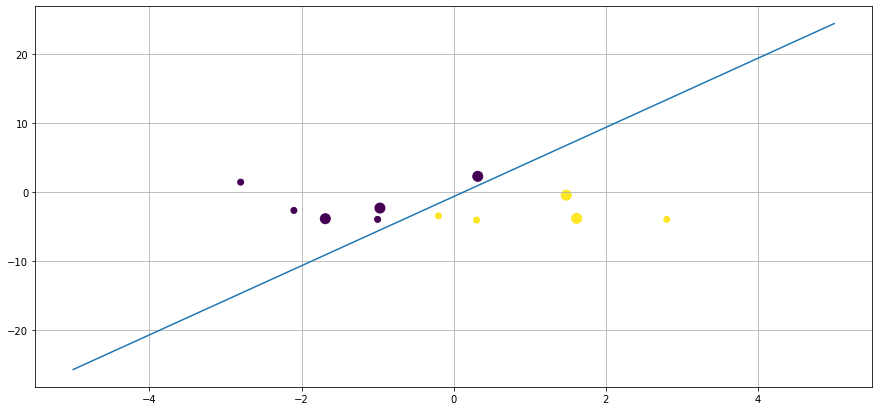

In [ ]:
check_model(data1, labels1, model1)

Видим, что перцептрон определил классы без ошибок

### Задание 2

In [ ]:
data2, labels2 = get_dataset(2)
data2, labels2

(array([[ 1.7,  3.3],
        [ 4.7, -4.5],
        [-0.5,  0.8],
        [ 1.8,  2.1],
        [ 1.5,  2.2],
        [-1.3,  0.8],
        [-3.9, -4.5],
        [ 4.7, -2.2]]), array([[1, 1],
        [0, 1],
        [1, 0],
        [1, 1],
        [1, 1],
        [1, 0],
        [0, 0],
        [0, 1]]))

In [ ]:
data2.shape, labels2.shape

((8, 2), (8, 2))

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(2, activation='sigmoid'))

In [ ]:
model2.compile(loss='bce', optimizer='adam')

In [ ]:
train_info2 = model2.fit(data2, labels2, batch_size=1, epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6630
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6521
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 1.6398
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6299
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6183
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 1.6083
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5968
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5871
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5755
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5667
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5561
Epoch 12/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5452
Epoch 13/500
8/8 [==============================] - 0s 2ms/st

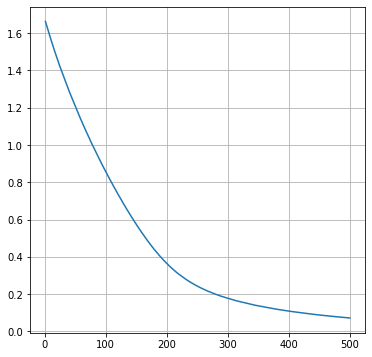

In [ ]:
plot_loss(train_info2)

Сейчас мы классифицируем уже на 4 класса, поэтому разделяющих прямых будет две.

Перцептрон в текущем задании эквивалентен формуле:
$$perceptron(x, y) = (x~~ y)
\begin{pmatrix}
  a_{00}& a_{01}\\
  a_{10}& a_{11}
\end{pmatrix} +
\begin{pmatrix}
  b_0\\
  b_1
\end{pmatrix} =
\begin{pmatrix}
  a_{00}x+a_{10}y + b_0\\
  a_{01}x+a_{11}y + b_1
\end{pmatrix}$$

Построив две разделяющие прямые, мы разобьем координатную плоскость на 4 сектора-класса

Модифицируем функцию:

In [ ]:
def plot_result_4classes(data, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(data[:, 0], data[:, 1], c=[int(str(i*10 + j), 2) for i, j in labels])

    A, b = model.layers[0].get_weights()

    x_disc = np.linspace(-5, 5, 5)
    plt.plot(x_disc, (-A[0][0] * x_disc - b[0]) / A[1][0])
    plt.plot(x_disc, (-A[0][1] * x_disc - b[1]) / A[1][1])

    plt.grid()
    if show_result:
        plt.show()

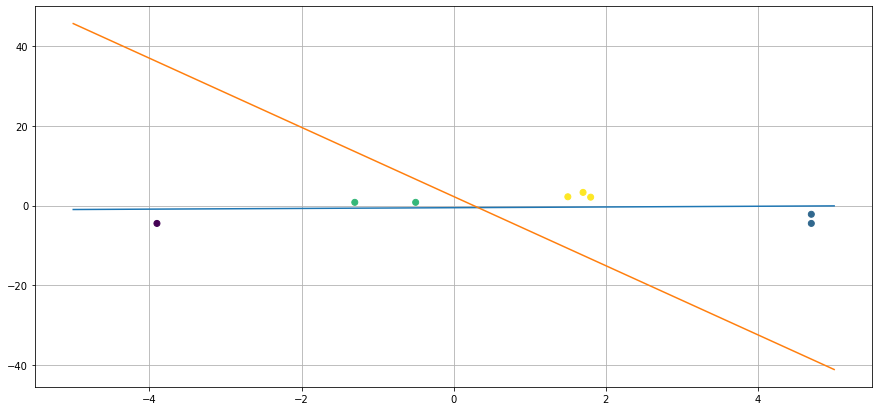

In [ ]:
plot_result_4classes(data2, labels2, model2)

Тестируем перцептрон.

In [ ]:
def check_model_4classes(data, labels, model, n=5, threshold=0.5):
    plot_result_4classes(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold

    plt.scatter(test_data[:, 0], test_data[:, 1],
                c=[int(str(i*10 + j), 2) for i, j in test_labels], s=100)
    plt.show()

1/1 [==============================] - 0s 76ms/step


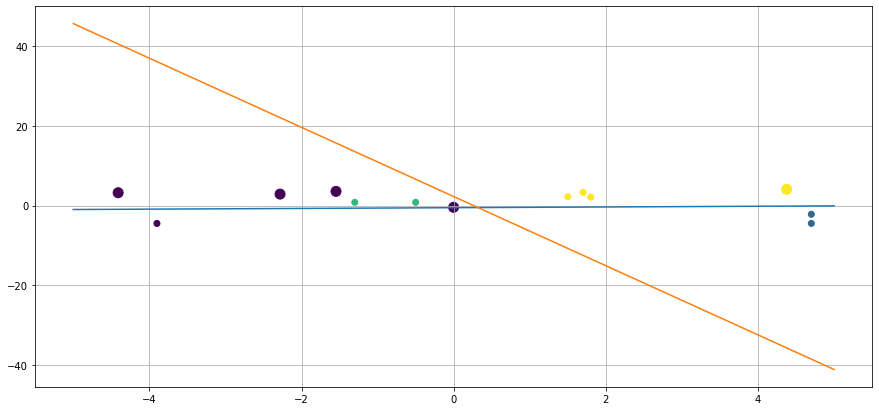

In [ ]:
check_model_4classes(data2, labels2, model2)

Видим, что перцептрон неплохо справляется с классификацией тестовых точек

# Вывод

В данной работе я освежил свои знания по перцетрону. Я решил задачу классификации на 2 и 4 класса с помощью однослойной нейросети. Обученный перцептрон довольно неплохо справляется со своей задачей - в этом мы убедились, проверив его на новых рандомно сгенерированных точках.

Немного непривычно было видеть двумерные лейблы в задаче классификации на 4 класса. Чтобы было удобнее определять цвета точек в матплотлибе, пришлось переводить эти лейблы в более привычный вид (0, 1, 2, 3).

Стоит отметить, что мы не можем гарантировать стопроцентное качество обученных моделей. При обучении использовалось очень мало данных. Поэтому иногда полученные модели могут ошибаться (особенно на точках вблизи разделяющих линий)